In [ ]:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1.fitting it to the periodic function
2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [92]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
%matplotlib inline

In [86]:
df=pd.DataFrame()

In [57]:
df['month'] = np.arange(12)
df['Max']=Max
df['Min']=Max
df

,month,Max,Min
0,0,39,39
1,1,41,41
2,2,43,43
3,3,47,47
4,4,49,49
5,5,51,51
6,6,45,45
7,7,38,38
8,8,37,37
9,9,29,29


In [93]:
plt.plot(df.month, df.Min,'go')
plt.plot(df.month, df.Max,'co')

AttributeError: 'DataFrame' object has no attribute 'month'

Text(0, 0.5, 'Min and max temperature')

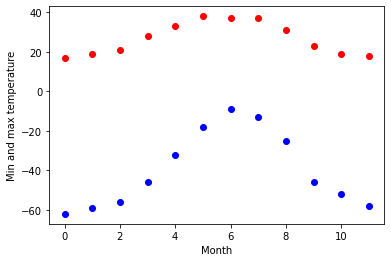

In [94]:
import numpy as np

temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, 'ro')

plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

Text(0, 0.5, 'Min and max temperature')

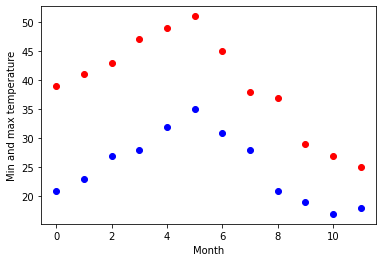

In [95]:
import numpy as np

temp_max = np.array(Max)
temp_min = np.array(Min)

import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, 'ro')

plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [104]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

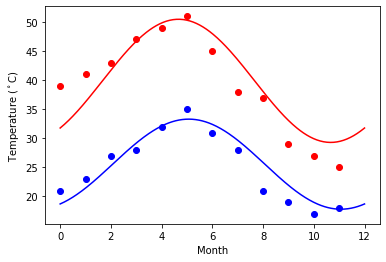

In [105]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [113]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

<frozen importlib._bootstrap>:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



In [ ]:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [107]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

In [108]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


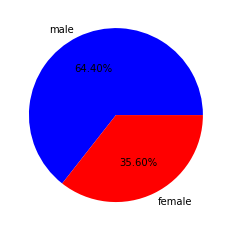

In [142]:
#fig,ax=plt.subplots()
plt.pie(titanic['sex'].value_counts(),labels=['male','female'],autopct='%1.2f%%',colors=['b','r'])
plt.show()

In [153]:
titanic.iplot(y='fare',x='age',kind='scatter',mode='markers')

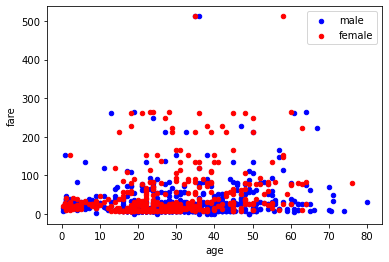

In [173]:
ax=titanic[titanic['sex']=='male'].plot.scatter('age','fare',color='b',label='male')
titanic[titanic['sex']=='female'].plot.scatter('age','fare',ax=ax,color='r',label='female')

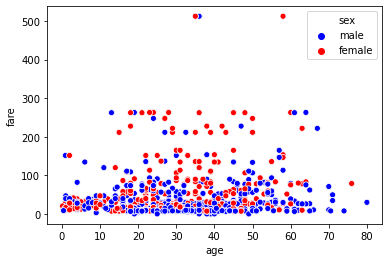

In [166]:
sns.scatterplot(data=titanic,x='age',y='fare',hue='sex',palette=['b','r'],hue_order=['male','female'])